In [2]:
import numpy as np
from pylab import plt, mpl

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [5]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

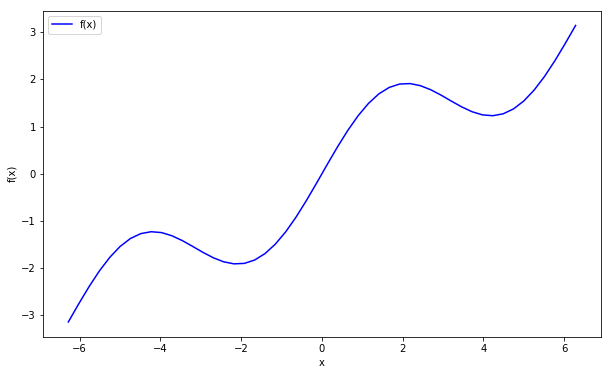

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

In [8]:
res = np.polyfit(x,f(x), deg=1, full=True)

In [9]:
res

(array([ 4.28841952e-01, -5.69158516e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [10]:
ry = np.polyval(res[0], x)

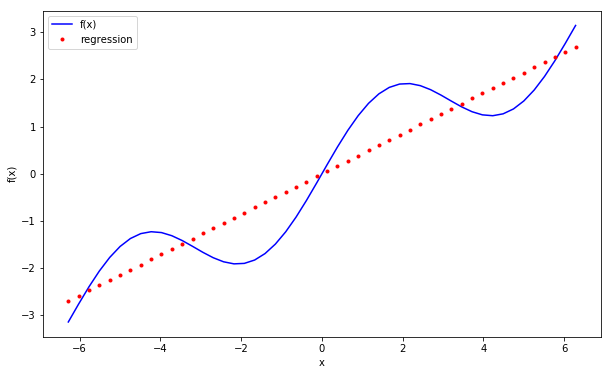

In [11]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

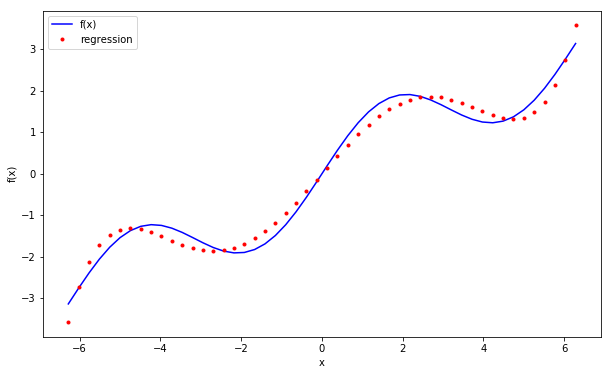

In [12]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [14]:
matrix = np.zeros((3+1, len(x)))
matrix[3,:] = x ** 3
matrix[2,:] = x ** 2
matrix[1,:] = x
matrix[0,:] = 1

In [16]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [17]:
reg.round(4)

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [18]:
ry = np.dot(reg, matrix)

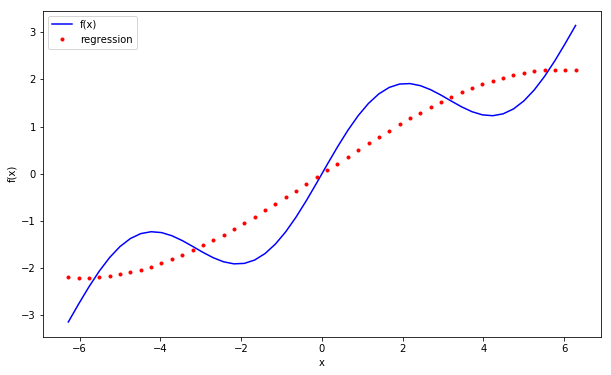

In [19]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [20]:
# Noise

In [21]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [23]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

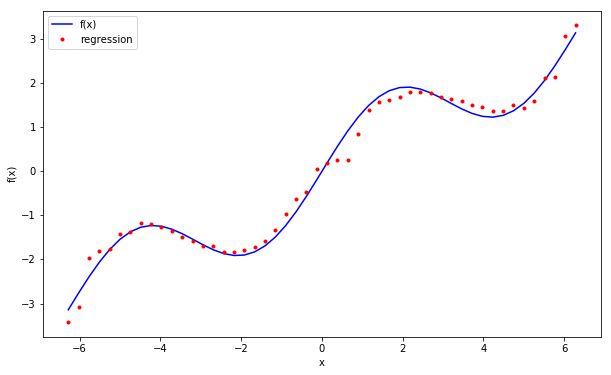

In [24]:
create_plot([x,x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [25]:
# multidimensional

In [26]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [33]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X,Y = np.meshgrid(x,y)
X[:4]

array([[ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  

In [34]:
Z = fm((X,Y))
x = X.flatten()
y = Y.flatten()

In [36]:
from mpl_toolkits.mplot3d import Axes3D

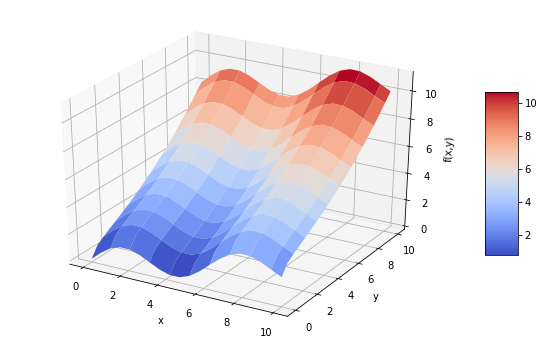

In [43]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X,Y,Z, rstride=2, cstride=2,
                      cmap='coolwarm', linewidth=0.5,
                      antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [45]:
# Interpolation 補間

In [46]:
import scipy.interpolate as spi

In [47]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [ ]:
def f(x):
    return np.sin(x)